Proposal of health insurance is important as it provides coverage against hospitalisation and medication.It also provides financial protection and access to healthcare services to the individuals as there is increase in medical costs 
in today's world.

So building a machine learning model which predicts the price of health insurance is important so that it will be helpful for individuals in paying accurate amount to the companies and also helps insurance companies determine appropriate premiums and manage their financial risk.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

In [105]:
dataset=pd.read_excel('/content/Health_insurance_cost (2).xlsx')

In [106]:
dataset.describe(include="all")

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [107]:
dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Analysis using plots

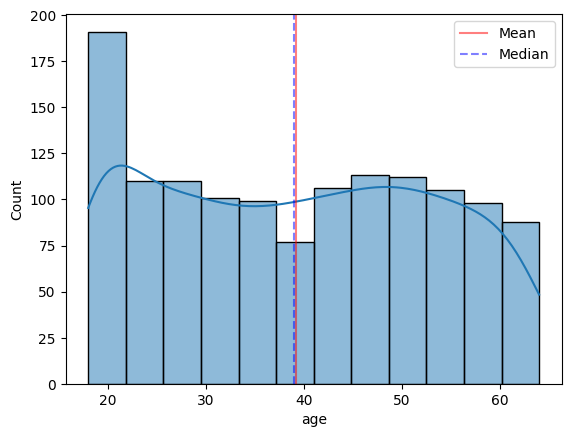

In [109]:
sns.histplot(data = dataset['age'], kde = True)
plt.axvline(x=dataset.age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset.age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

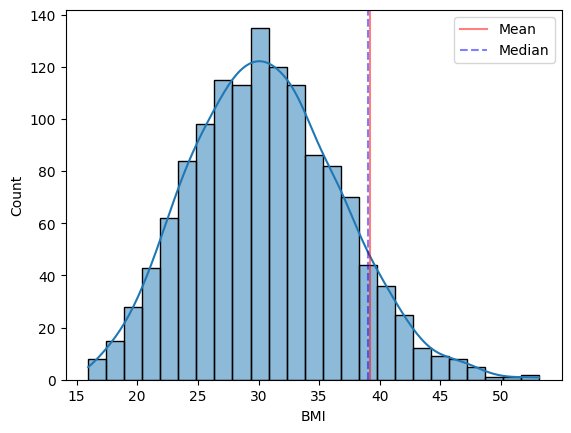

In [110]:
sns.histplot(data = dataset['BMI'], kde = True)
plt.axvline(x=dataset.age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset.age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

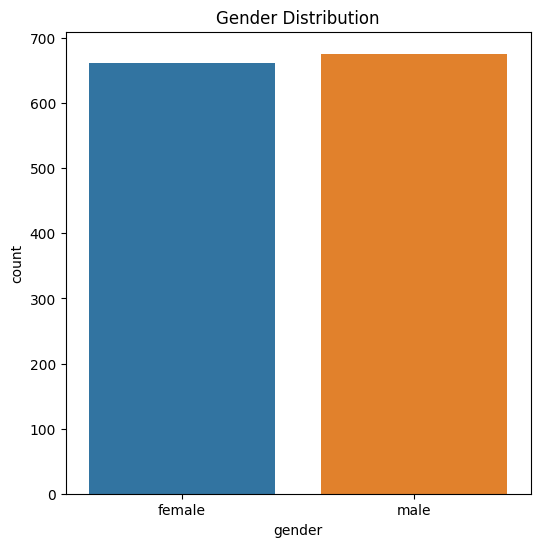

In [111]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=dataset)
plt.title('Gender Distribution')
plt.show()

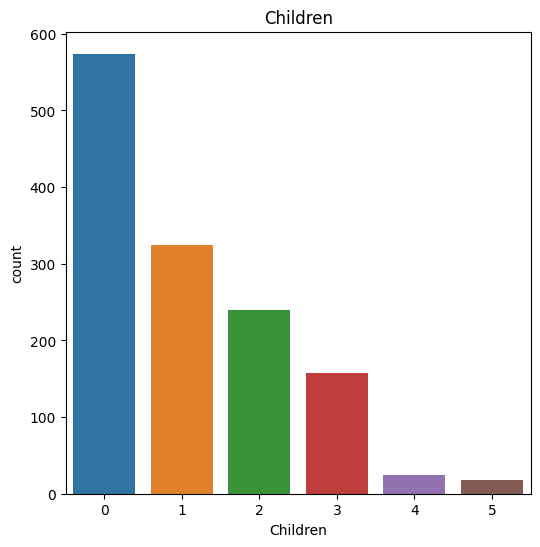

In [112]:
plt.figure(figsize=(6,6))
sns.countplot(x='Children', data=dataset)
plt.title('Children')
plt.show()

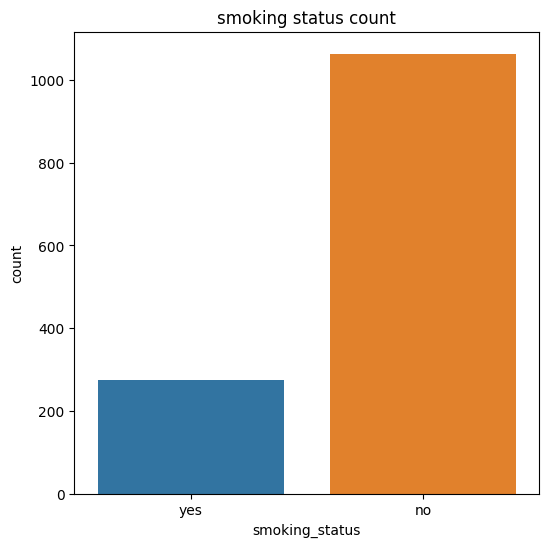

In [113]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoking_status', data=dataset)
plt.title('smoking status count')
plt.show()

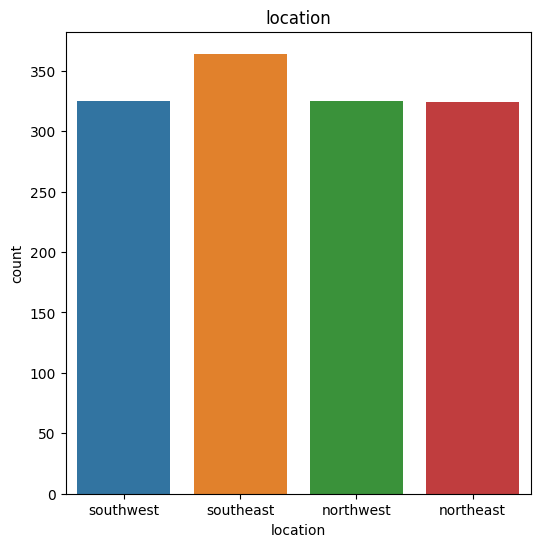

In [114]:
plt.figure(figsize=(6,6))
sns.countplot(x='location', data=dataset)
plt.title('location')
plt.show()

<Axes: xlabel='age', ylabel='health_insurance_price'>

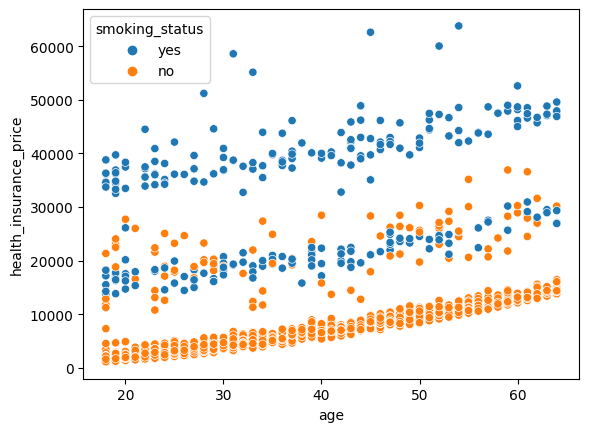

In [115]:
sns.scatterplot(data=dataset, x=dataset['age'], y=dataset['health_insurance_price'],hue=dataset['smoking_status'])

With increase in age health insurance price is also increasing

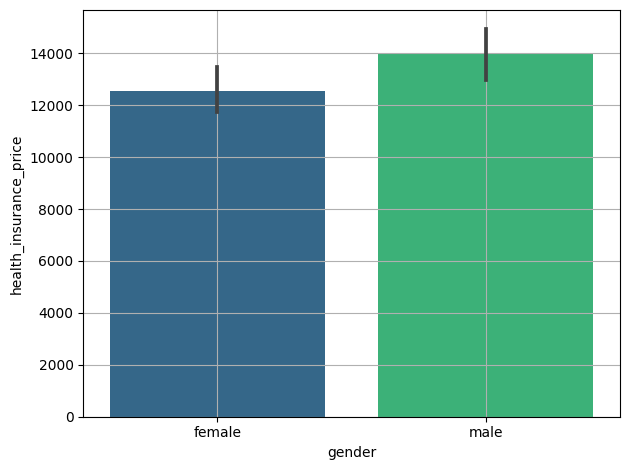

In [116]:
sns.barplot(x='gender',y='health_insurance_price',data=dataset,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Male applicant have a bit higher health insurance price as compared to female.

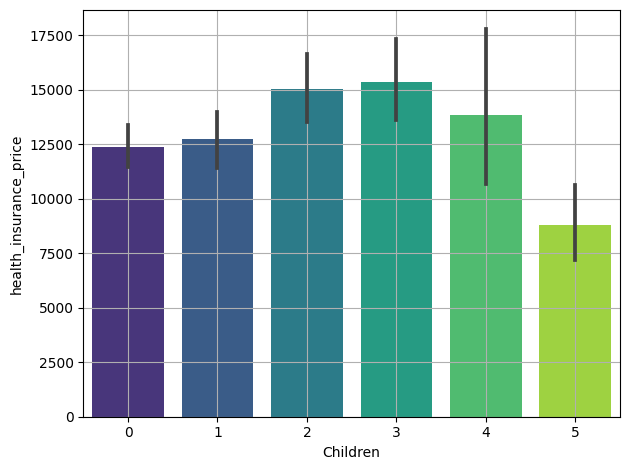

In [117]:
sns.barplot(x='Children',y='health_insurance_price',data=dataset,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Individuals with 2 or 3 children have more health insurance price

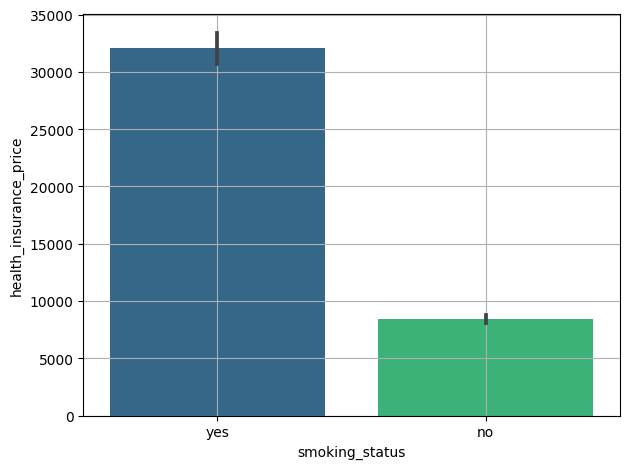

In [118]:
sns.barplot(x='smoking_status',y='health_insurance_price',data=dataset,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

It can be observed that smokers pay high health insurance price

In [119]:
dataset.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


Dealing with missing values.
There are missing values in age,BMI and health_insurance_price columns.
Replacing these missing values with mean using impputing technique is as follows.

In [120]:
dataset.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [121]:
mean_age = dataset['age'].mean()
mean_BMI = dataset['BMI'].mean()
mean_health_insurance_price = dataset['health_insurance_price'].mean()

dataset['age'].fillna(mean_age, inplace=True)
dataset['BMI'].fillna(mean_BMI, inplace=True)
dataset['health_insurance_price'].fillna(mean_health_insurance_price, inplace=True)



In [122]:
dataset.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [123]:
dataset.age[dataset.age==0]

Series([], Name: age, dtype: float64)

In [124]:
dataset.BMI[dataset.BMI==0]

Series([], Name: BMI, dtype: float64)

In [125]:
dataset.health_insurance_price[dataset.health_insurance_price==0]

Series([], Name: health_insurance_price, dtype: float64)

Coverting categorical data to numerical:There are three categorical variables in the dataset named gender,smoking_status and location which are to be converted to numerical variables using encoding technique as follows.

In [126]:
dataset.replace({'gender':{'male':0,'female':1}}, inplace=True)

dataset.replace({'smoking_status':{'yes':0,'no':1}}, inplace=True)

dataset.replace({'location':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


Outliers

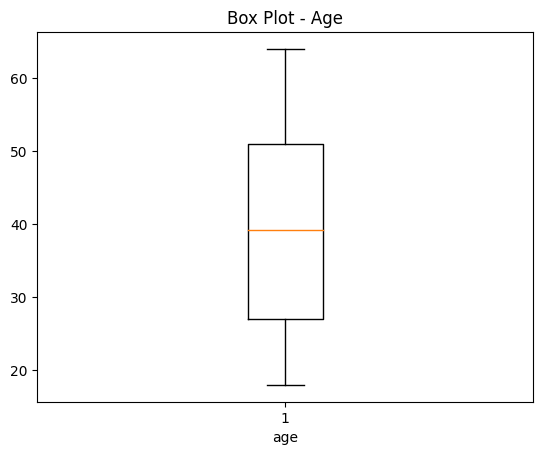

In [127]:
age = dataset['age']
plt.boxplot(age, vert=True)
plt.xlabel('age')
plt.title('Box Plot - Age')
plt.show()

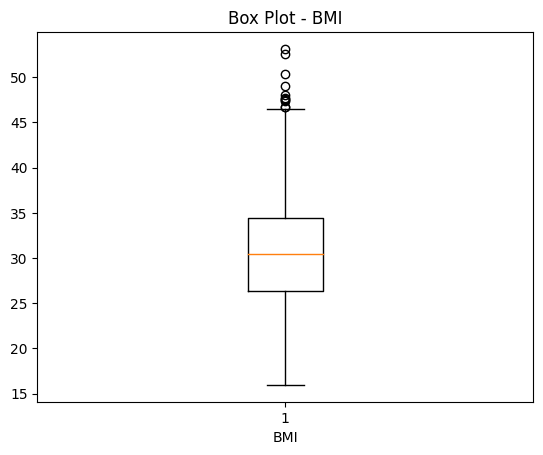

In [128]:
bmi = dataset['BMI']
plt.boxplot(bmi, vert=True)
plt.xlabel('BMI')
plt.title('Box Plot - BMI')
plt.show()

In [129]:
count = dataset[dataset['BMI'] > 45]['BMI'].count()
print(count)

20


In [130]:
mean_bmi = dataset['BMI'].mean()

In [131]:
dataset.loc[dataset['BMI'] > 45, 'BMI'] = mean_bmi

Splitting the dataset

In [132]:
X = dataset.drop(columns='health_insurance_price', axis=1)
Y = dataset['health_insurance_price']

In [133]:
print(X)

       age  gender        BMI  Children  smoking_status  location
0     19.0       1  30.638217         0               0         1
1     18.0       0  33.770000         1               1         0
2     28.0       0  33.000000         3               1         0
3     33.0       0  22.705000         0               1         3
4     32.0       0  28.880000         0               1         3
...    ...     ...        ...       ...             ...       ...
1333  50.0       0  30.970000         3               1         3
1334  18.0       1  31.920000         0               1         2
1335  18.0       1  36.850000         0               1         0
1336  21.0       1  25.800000         0               1         1
1337  61.0       1  29.070000         0               0         3

[1338 rows x 6 columns]


In [134]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [136]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using linear regression 

In [138]:
from sklearn.linear_model import LinearRegression




In [139]:
lr=LinearRegression()
lr.fit(X_train,Y_train)



LinearRegression()

In [140]:
print('Coefficients: ', lr.coef_)

Coefficients:  [   257.44890911    206.43403411    358.27513129    607.18844061
 -23738.22062862    243.61322666]


Evaluating the model using R2 score

In [141]:
training_data_prediction = lr.predict(X_train)

In [142]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Score: ', r2_train)

R2 Score:  0.7439166014900536


In [143]:
test_data_prediction = lr.predict(X_test)

In [144]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R2 Score : ', r2_test)

R2 Score :  0.736563153752871


Using random forest

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [147]:
training_data_prediction = rf.predict(X_train)

In [148]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Score: ', r2_train)

R2 Score:  0.9739726476942235


In [149]:
test_data_prediction = rf.predict(X_test)

In [150]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R2 Score : ', r2_test)

R2 Score :  0.8472501965734789


Using Gradient boosting

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

In [152]:
gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [153]:
training_data_prediction = gr.predict(X_train)

In [154]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Score: ', r2_train)

R2 Score:  0.8931727296325634


In [155]:
test_data_prediction = rf.predict(X_test)

In [156]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R2 Score : ', r2_test)

R2 Score :  0.8472501965734789


Using decision trees

In [157]:
from sklearn.tree import DecisionTreeRegressor


In [158]:
rf = DecisionTreeRegressor()
rf.fit(X_train,Y_train)

DecisionTreeRegressor()

In [159]:
training_data_prediction = rf.predict(X_train)

In [160]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Score: ', r2_train)

R2 Score:  0.9983186994566906


In [161]:
test_data_prediction = rf.predict(X_test)

In [162]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R2 Score : ', r2_test)

R2 Score :  0.6653812444701082
